***Reference:***<br>
***Raschka, Sebastian; Liu, Yuxi (Hayden); Mirjalili, Vahid. Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt Publishing.*** 

# ***<u>Chapter 2</u>***


## ***Training Simple Machine Learning Algorithm for Classification***

***In this chapter, we will make use of two of the first algorithmically described machine learning algorithms for classification:*** 
- **the Perceptron** and 
- **Adaptive Linear Neurons**

### **MCP Neuron Model**
*A nerve cell as a simple logic gate with binary outputs; multiple signals arrive at the dendrites, they are then integrated into the cell body, and, if the accumulated signal exceeds a certain threshold, an output signal is generated that will be passed on by the axon.*

### **Perceptron Learning Rule**
***It is based on MCP Neuron model which automatically learns the optimal weight coeffs. that would be multiplied with the i/p features in order to make the decision weather a neuron fires(transmits a signal) or not. In context of classification, such an algorithm predicts weather a new data point belongs to one class or the other.***

### ***Binary Classification***
In context of  binary classification task with two classes: 0 and 1. We can then define a **decision function**, $\sigma(Z)$, that takes a linear combination of input values, $x$, and a corresponding weight vector, $w$, where **z** is the so-called **net input**,  
$z = w_1x_1 + w_2x_2 + \cdots + w_mx_m:$ 
$$w = \begin{bmatrix}
w_1\\
\vdots\\
w_m
\end{bmatrix}, 
x = \begin{bmatrix}
x_1\\
\vdots\\
x_m
\end{bmatrix}$$

*Now if the net i/p is greater than a defined threshold $\theta$, we predict class 1, and class 0 otherwise.* ***(unit step function)***
$$\sigma(z) = 
\left\{
\begin{array}{ll}
1 & \mbox{if z $\geq$ $\theta$},\\
0 & \mbox{otherwise}
\end{array}
\right.$$

Modify the above equation as $z - \theta \geq 0$ and<br> define **bias unit** as $b = -\theta$ and make it a part of net i/p as 
$$z = w_1x_1 + w_2x_2 + \cdots + w_mx_m + b$$ $$ z = w^Tx + b$$ and the decison function(**unit step function**) changes as
$$\sigma(z) = 
\left\{
\begin{array}{ll}
1 & \mbox{if z $\geq$ 0},\\
0 & \mbox{otherwise}
\end{array}
\right.$$


Figure illustrates how the net input $z = w^Tx + b$ is squashed into a binary output (0 or 1) by the decision function of the perceptron (left subfigure) and how it can be used to discriminate b/w two classes separable by a linear decision boundary (right subfigure):
![img01](Images/img01.png)
**A threshold function producing a linear decision boundary for a binary classification problem**

### ***The Perceptron Learning Rule***

1. ***Initialize the weights and bais unit to 0 or some small random numbers.***
2. ***For each training example,*** $x^{(i)}$:
    - ***Compute the o/p value,*** $\hat{y}^{(i)}$
    -  ***Update the weights & bias unit***(if o/p value is wrong)
    
- Here the o/p value is the class label 0 or 1 predicted by the unit step function as defined earlier.

- Update of the bias unit & each weight - 
$$w_j := w_j + \Delta{w_j}$$
$$b := b + \Delta{b}$$

- The update values are computed as:
$$\Delta{w_j} = \eta(y_{(i)} - \hat{y}^{(i)}){x_j}^{(i)}$$
$$\Delta b = \eta(y_{(i)} - \hat{y}^{(i)})$$

- $\eta$ is the **learning rate** - b/w 0 and 1
- $y^{(i)}$ - is **true class label** of the $i^{th}$ training example and $\hat{y}^{(i)}$ is the **predicted class label**.

- Basically in Perceptron the weight vector in updated when the algorithm makes wrong prediction.

- **Convergance of perceptron is only guaranteed if the two classes are linearly seperable.<br>As the No. of mistakes made by perceptron can upper bounded**<br> <a href="https://drive.google.com/file/d/14n87kZlIbSw6qnFyGZDR14OLpPyUI6Pq/view?usp=sharing">Proof of Convergence of Perceptron</a>

- **Why only linearly seperable?**
    - ***Since we are updating the weights every time there is a missclasification, so if the data-points are perfectly linearly seprable we might end up updating forever as in any given iteration if one point is correctly classified, there will be some other point that will have been misclassified. Thus the datapoints must be linearly separable.***
<br></br>
- **If the two classes can't be separated by linear decision boundary, set a max. num of passes over the training dataset(epochs) and/or a threshold for the no. of tolerated misclassifications--the perceptron would never stop updating the weights otherwise.**

In [1]:
import numpy as np

class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset. 
    random_state : int
      Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features], X ∈ R^(n*d)
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object
        """
        
        #RandomState exposes a number of methods for generating random numbers drawn from a variety of probability distributions.
        rgen = np.random.RandomState(seed=self.random_state)
        
        # here we are initializing the weight vector with mean=0, std_dev=0.01
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        # initializing bias = 0
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for i in range(self.n_iter):
            errors = 0
            for x_i, target in zip(X,y):
                update = self.eta * (target - self.predict(x_i))
                self.w_ += update*x_i
                self.b_ += update
                errors += int(update!=0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        '''Calculate the net input'''
        return np.dot(X,self.w_) + self.b_
    
    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.net_input(X)>=0.0, 1, 0)

- Using above, we can now initialize new Perceptron objects with a given learning rate, eta, and the number of epochs, n_iter (passes over the training dataset).

- Via fit method, initialize the bias self.b_ = 0 and weights in self.w_ to a vector, $R^m$, m = No. of dimensions(features) in the dataset

- Notice, initial weight vector contains small random nums. drawn from a normal dist. with std_dev = 0.01

- Technically, we could initialize the weights to zero (in fact, this is done in the original perceptron algorithm). However, if we did that, then the learning rate (eta) would have no effect on the decision boundary. If all the weights are initialized to zero, the learning rate parameter, eta, affects only the scale of the weight vector, not the direction.

- self.errors_ list is made so that we can later analyze (the No. of misclassificatios in each epoch) how well the perceptron has performed during the training.

#### Applying Perceptron to iris dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(s, header=None, encoding='utf-8')
df.columns = ['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class']
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


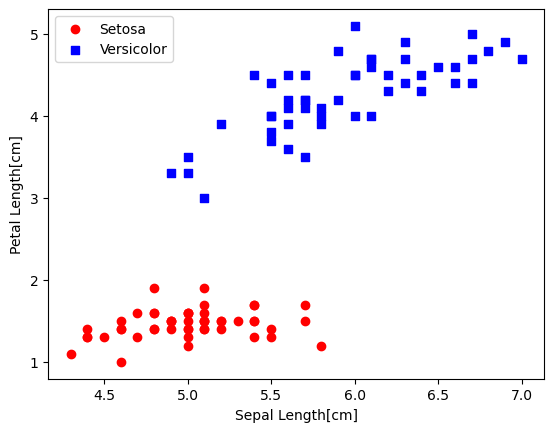

In [4]:
# For perceptron we'll only consider only 2 categories and 2 flower types
# Extracting Setosa(0), Versicolor(1) and sepal length & petal length

# select setosa & versicolor
y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa', 0, 1)

# extract sepal length & petal length
X = df.iloc[0:100, [0,2]].values


# plot data

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')

plt.xlabel("Sepal Length[cm]")
plt.ylabel("Petal Length[cm]")
plt.legend()
plt.show();

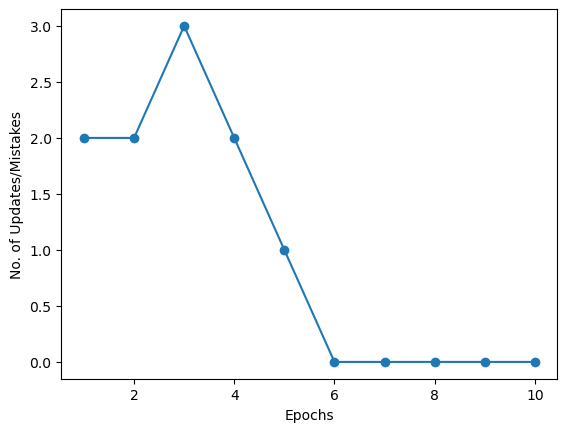

In [5]:
# Here we can clearly see that data is linearly seperable, thus perceptron should classify correcly

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("No. of Updates/Mistakes")
plt.show();

#### A function for plotting decision regions

In [6]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

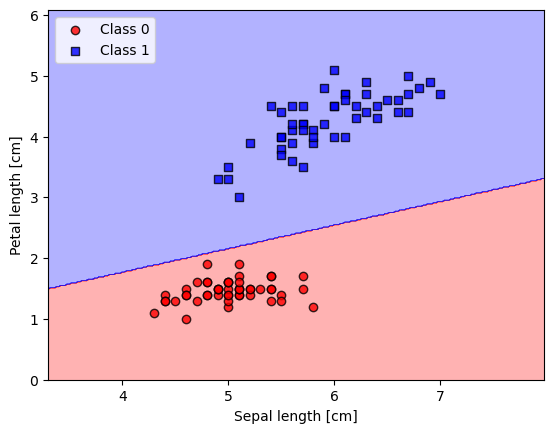

In [7]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')


#plt.savefig('images/02_08.png', dpi=300)
plt.show();

### ***Adaline and the convergence of learning***

- **ADAaptive LInear NEuron (Adaline)** - A type of *single layer neural network(NN)*

- The key diff. b/w Adaline & Perceptron is that weights are updated based on a ***linear activation function*** rather than a **unit step function* like in perceptron.

- In Adaline, the *linear activation function* is simply the **identity function** of the net i/p $(z = w^Tx + b)$ $$\sigma(z) = z$$

![Adaline_Perceptron](Images/Adaline_Perceptron.png)

### ***Minimizing Loss function with Gradient Descent***

- The objective is to minimize the **Mean Squared Error(MSE) [or the Objective Function/Loss Function]** b/w the calculated o/p and the true class label:$$L(\textbf{w},b) = \frac{1}{2n} \sum_{i=1}^{n} \left(y^{(i)} - \sigma(z^{(i)})\right)^{2}$$

- The main advantage of this continuous linear activation function, in contrast to the unit step function, is that the loss function becomes differentiable. Another nice property of this loss function is that it is convex; thus, we can use a very simple yet powerful optimization algorithm called gradient descent.

- So, we can the update as 
$$\Delta w_j = -\eta \frac{\partial L}{\partial w_j} \text{ and } \Delta b = -\eta \frac{\partial L}{\partial b} $$

$$w: = w + \Delta w \text{ , } b: = b + \Delta b$$

where

$$\frac{\partial L}{\partial w_j} = -\frac{2}{n}\sum_{i} \left(y^{(i)} - \sigma(z^{(i)}) \right)x_{j}^{(i)}$$

$$\frac{\partial L}{\partial b} = -\frac{2}{n}\sum_{i} \left(y^{(i)} - \sigma(z^{(i)}) \right)$$

In [8]:
# Implementing Adaline in Python

class AdalineGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X,y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y-output
            self.w_ += self.eta*2.0*X.T.dot(errors)/X.shape[0]
            self.b_ += self.eta*2.0*errors.mean()
            loss = (errors**2).mean() # Mean Squared Error
            self.losses_.append(loss)
            
        return self
            
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        "Compute linear activation sigma(z) = z"
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

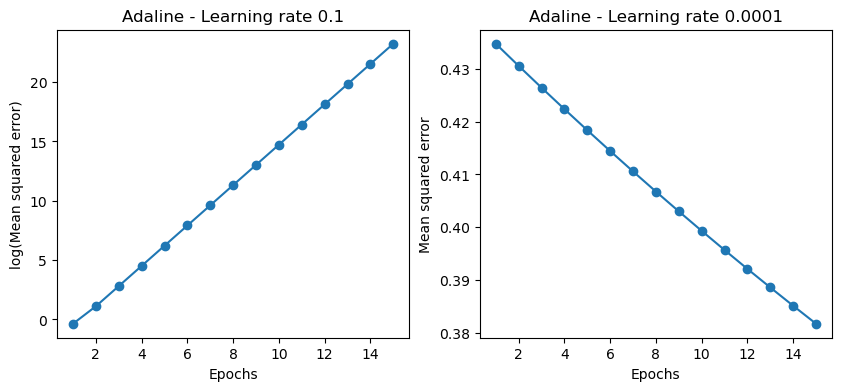

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)

ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show();

- Left chart shows that if learning rate eta is too large, then instead of minimizing the loss fuction, the MSE becomes larger in every epoch, becoz we overshoot the global minima.

- On the other hand, we can see that the loss decreases on the right plot, but the chosen learning rate, is so small that the algorithm would require a very large number of epochs to converge to the global loss minimum.

![gd](Images/gd.png)

### ***Improving Gradient Descent through feature scaling***

- Gradient descent is one of the many algorithms that benefit from feature scaling. 

- We will use a ***feature scaling method called standardization.*** This normalization procedure helps gradient descent learning to converge more quickly; however, it does not make the original dataset normally distributed. 

- ***Standardization shifts the mean of each feature so that it is centered at zero and each feature has a standard deviation of 1 (unit variance).***

- To standardize the jth feature $$x_{j}^{'} = \frac{x_j - \mu_j}{\sigma_j}$$ Here, $x_j$ is a vector consisting of the $j^{th}$ feature values of all training examples, n, and this standardization technique is applied to each feature, j, in our dataset.

- One of the reasons why standardization helps with gradient descent learning is that it is easier to find a learning rate that works well for all weights (and the bias). If the features are on vastly different scales, a learning rate that works well for updating one weight might be too large or too small to update the other weight equally well. Overall, using standardized features can stabilize the training such that the optimizer has to go through fewer steps to find a good or optimal solution (the global loss minimum).

In [10]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

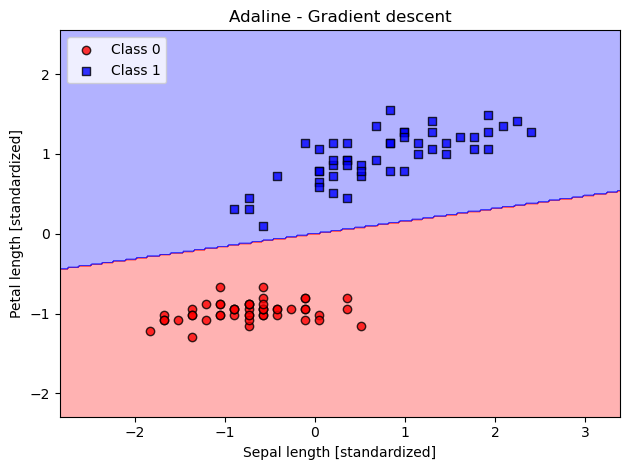

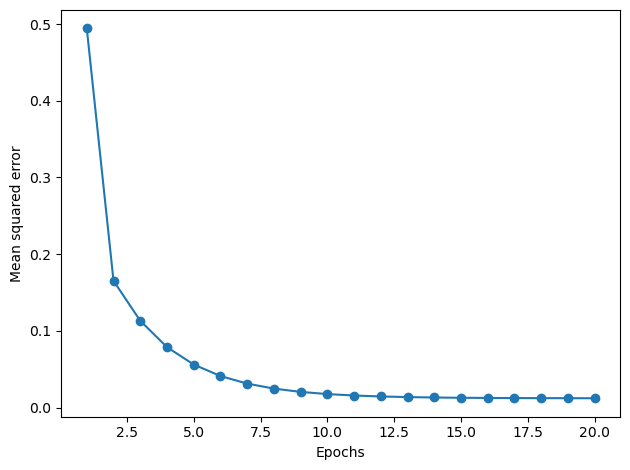

In [11]:
ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

plot_decision_regions(X=X_std, y=y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

plt.tight_layout()
#plt.savefig('images/02_14_2.png', dpi=300)
plt.show();

### ***Large scale ML and Stochastic Gradient Descent(SGD)***

- When we have large scale datasets, we used SGD.

- A popular alternative to the batch gradient descent algorithm is *stochastic gradient descent (SGD), which is sometimes also called iterative or online gradient descent.*

- Instead of updating the weights based on the sum of the accumulated errors over all training examples,<br><br> $\Delta w_j = \frac{2\eta}{n}\sum_{i} \left(y^{(i)} - \sigma(z^{(i)}) \right)x_{j}^{(i)}$ <br><br> we update the parameters incrementally for each training excample, for instance: <br><br> $\Delta w_j = \eta \left(y^{(i)} - \sigma(z^{(i)})\right)x_{j}^{(i)}, \Delta b = \eta \left(y^{(i)} - \sigma(z^{(i)})\right)$

- **Although SGD can be considered as an approximation of gradient descent, it typically reaches convergence much faster because of the more frequent weight updates.**

- **Adjust the learning rate during training**

- in SGD, the fixed learning rate, $\eta$, is often replaced by an **adaptive learning rate** *that decreases over time,*<br>for example:<br> $\frac{c_1}{\text{[no. of iterations] } + c_2}$<br> where c_1 and c_2 are constants.

- Note that SGD does not reach the global loss minimum but an area very close to it. And using an adaptive learning rate, we can achieve further annealing to the loss minimum.

- Another advantage of SGD is that we can use it for online learning. In online learning, our model is trained on the fly as new training data arrives. This is especially useful if we are accumulating large amounts of data, for example, customer data in web applications. Using online learning, the system can immediately adapt to changes, and the training data can be discarded after updating the model if storage space is an issue.

#### ***Mini-batch Gradient Descent***

***A compromise between full batch gradient descent and SGD is so-called mini-batch gradient descent. Mini-batch gradient descent can be understood as applying full batch gradient descent to smaller subsets of the training data, for example, 32 training examples at a time. The advantage over full batch gradient descent is that convergence is reached faster via mini-batches because of the more frequent weight updates.***

In [12]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    losses_ : list
      Mean squared error loss function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

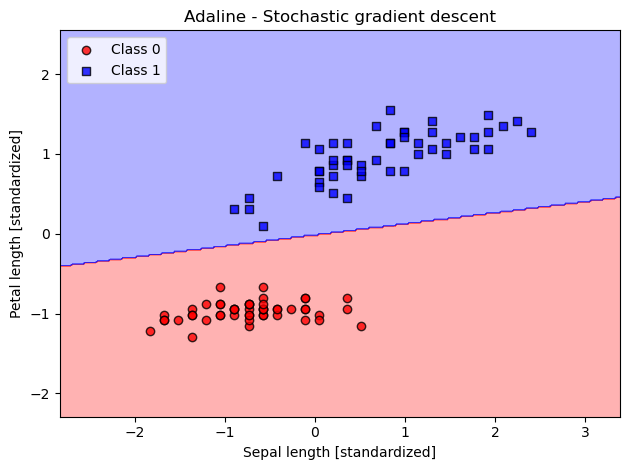

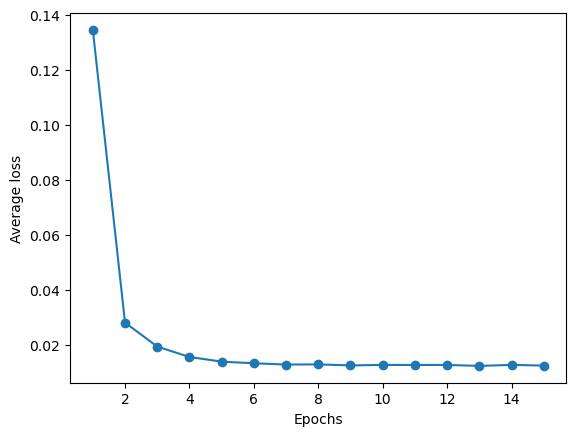

In [13]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('figures/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')

# plt.savefig('figures/02_15_2.png', dpi=300)
plt.show();

## **Summary**

1. Perceptron
2. Adaline 
3. Gradient Descent & Schoastic Gradient Descent

***Reference:***<br>
***Raschka, Sebastian; Liu, Yuxi (Hayden); Mirjalili, Vahid. Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt Publishing.*** 